In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from feature_selection import *
from main import load_log_and_qps
from traversal import get_log_dirs, get_log_and_std_files

In [2]:
tau = 0.045


def fourier(x, *a):
    ret = a[0] * np.cos(np.pi / tau * x)
    for deg in range(1, len(a)):
        ret += a[deg] * np.cos((deg + 1) * np.pi / tau * x)
    return ret

In [5]:
log_dir_prefix = "fillrandom_pri_L1_Deep_L0/"
dirs = get_log_dirs(log_dir_prefix)

In [6]:
log_dir = dirs[8]
print(log_dir)
stdout_file, LOG_file, report_csv = get_log_and_std_files(log_dir)
data_set = load_log_and_qps(LOG_file, report_csv)
lsm_shape = generate_lsm_shape(data_set)
plot_level = 5

compaction_df = vectorize_by_compaction_output_level(data_set, plot_level)

fillrandom_pri_L1_Deep_L0/StorageMaterial.SATAHDD/12CPU/64MB
      flushes  l0compactions  other_compactions  read   write  level0  level1  \
0         0.0            0.0                0.0   0.0    0.00     0.0     0.0   
1         1.0            0.0                0.0   0.0   92.99     0.0     0.0   
2         2.0            0.0                0.0   0.0  213.68     0.0     0.0   
3         2.0            0.0                0.0   0.0  239.91     0.0     0.0   
4         1.0            0.0                0.0   0.0  119.22     0.0     0.0   
...       ...            ...                ...   ...     ...     ...     ...   
1895      0.0            0.0                0.0   0.0    0.00     0.0     0.0   
1896      0.0            0.0                0.0   0.0    0.00     0.0     0.0   
1897      0.0            0.0                0.0   0.0    0.00     0.0     0.0   
1898      0.0            0.0                0.0   0.0    0.00     0.0     0.0   
1899      0.0            0.0                0.0 

/home/jinghuan/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


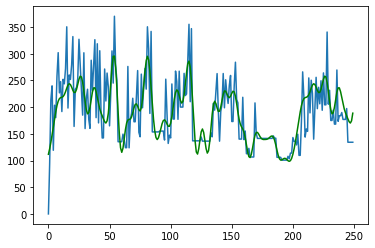

In [83]:
def fourier(x, *a):
    w = 2 * np.pi / 200
    ret = 0
    for deg in range(0, int(len(a) / 2) + 1):
        ret += a[deg] * np.cos(deg * w * x) + a[len(a) - deg - 1] * np.sin(deg * w * x)
    return ret

write_list = compaction_df["write"].tolist()[0:250]
z = np.array(range(len(write_list))).astype(float)
Ua = write_list
popt,pcov = curve_fit(fourier, z, Ua,[1.0]*50)

fig = plt.figure()
ax1 = fig.add_subplot(111)
p1, = plt.plot(z,Ua)
plt.plot(z, fourier(z, *popt), color='g', label="fitting")

plt.show()

[185.32283344 -16.64525609 -10.28884991 -10.35547024  -0.59655221
  -6.18078552 -25.96967345   8.8712685    1.86937979  -4.56713718
  -1.53062603  -3.12765886   6.50902162 -11.35801986   0.67605915
   9.25796685  -3.45772913  -3.2107116   -7.84844058   6.33040683
  -8.08098891   2.01961704   5.54722683  -2.68837976  -1.19567066
   2.4716516    5.85772584  -6.23414358  -2.01856029   2.02804213
  -3.42709154   5.83900119  -6.1922879    8.91087133  -1.63532547
 -13.93468647   5.61344182   4.93222694   4.53928341  -8.4366042
   3.38291966  10.73854735  -8.39980181  22.30909958 -11.08701729
   8.50831953  21.1881939   23.06487136  23.51418565   1.        ]


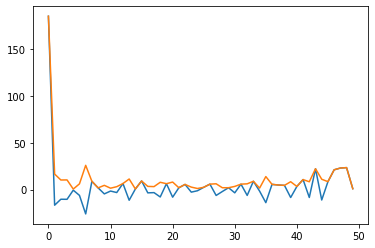

In [75]:
# Reducing the noise frequency
print(popt)
plt.plot(popt)

plt.plot(np.abs(popt))
plt.show()

41.423120155937504

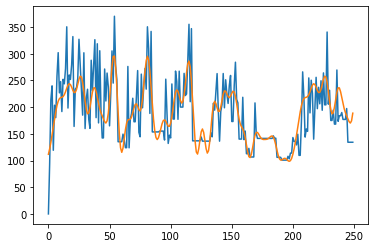

In [92]:
fig = plt.figure()


p1, = plt.plot(z,Ua)
plt.plot(z,fourier(z,*popt))

from sklearn.metrics import mean_squared_error

In [98]:
write_list = compaction_df["write"].tolist()

def split_the_timeline(fit_input,series_num=50):

    z = np.array(range(len(fit_input))).astype(float)
    Ua = fit_input
    popt,pcov = curve_fit(fourier, z, Ua,[1.0]*series_num)
    return mean_squared_error(Ua,fourier(z,*popt),squared=False)

fit_input = write_list[0:250]
print(split_the_timeline(fit_input))
fit_input = write_list[250:500]
print(split_the_timeline(fit_input))
fit_input = write_list[500:750]
print(split_the_timeline(fit_input))

/home/jinghuan/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jinghuan/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jinghuan/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


42.270571286220644
35.75884688422975
28.957598823402872
